In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
#import dask.dataframe as dd #https://medium.com/analytics-vidhya/optimized-ways-to-read-large-csvs-in-python-ab2b36a7914e
                            #READ ABOUT DASK
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
#Read the dataset extensions
#df1 = dd.read_csv("steam_reviews_bonus_1.csv") #engine='python')
#df2 = dd.read_csv("steam_reviews_bonus_2.csv") #engine='python')

In [7]:
#Add them to the original dataset
#df1.to_csv("steam_reviews.csv", mode="a", header=None, index=False)
#df2.to_csv("steam_reviews.csv", mode="a", header=None, index=False)

In [8]:
#Import the extended dataset
#df = dd.read_csv('steam_reviews.csv', engine='python', usecols= ["app_id","review", "weighted_vote_score", "steam_purchase", "received_for_free"])

In [9]:
#import the WHOLE dataset
#df = pd.DataFrame()
#for chunk in pd.read_csv("steam_reviews.csv", chunksize=100_000):
#    print("\r"+str(len(df)), end="")
#    df = pd.concat([df, chunk], ignore_index=True)

In [7]:
#for now work on 0.1% of the dataset
import random
p=0.001
df = pd.read_csv("/content/drive/MyDrive/UNI/Data Science/Primo anno/Primo semestre/ADM/homeworks/hw2/steam_reviews.csv", header=0, skiprows=lambda i: i>0 and random.random() > p)
#df=pd.read_csv('/content/drive/MyDrive/UNI/Data Science/Primo anno/Primo semestre/ADM/homeworks/hw2/steam_reviews.csv', usecols= ["app_id","review", "weighted_vote_score", "steam_purchase", "received_for_free","timestamp_updated", "timestamp_created"])

# RQ1 Exploratory Data Analysis (EDA)

In [8]:
#Let's first have a look at what kind of data we are dealing with
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21673 entries, 0 to 21672
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      21673 non-null  int64  
 1   app_id                          21673 non-null  int64  
 2   app_name                        21673 non-null  object 
 3   review_id                       21673 non-null  int64  
 4   language                        21673 non-null  object 
 5   review                          21636 non-null  object 
 6   timestamp_created               21673 non-null  int64  
 7   timestamp_updated               21673 non-null  int64  
 8   recommended                     21673 non-null  bool   
 9   votes_helpful                   21673 non-null  int64  
 10  votes_funny                     21673 non-null  int64  
 11  weighted_vote_score             21673 non-null  float64
 12  comment_count                   

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,1049,292030,The Witcher 3: Wild Hunt,84977859,english,I do love Yen,1611064961,1611064961,True,0,0,0.000000,0,False,False,False,76561198821830287,67,4,6338.0,36.0,6338.0,1.611065e+09
1,4360,292030,The Witcher 3: Wild Hunt,84417526,russian,норм,1610270857,1610270857,True,0,0,0.000000,0,True,False,False,76561198092007749,53,2,7791.0,108.0,7682.0,1.610309e+09
2,4997,292030,The Witcher 3: Wild Hunt,84324288,turkish,oynanır,1610150642,1610150642,True,3,0,0.563492,0,True,False,False,76561199095440027,29,4,1619.0,1197.0,300.0,1.610842e+09
3,5178,292030,The Witcher 3: Wild Hunt,84295225,schinese,赞,1610118764,1610118764,True,0,0,0.000000,0,True,False,False,76561198866760773,14,2,2725.0,0.0,2719.0,1.610120e+09
4,5426,292030,The Witcher 3: Wild Hunt,84261555,schinese,ggggggggggggggggggggggood!,1610071634,1610071634,True,1,0,0.000000,0,True,False,False,76561199029014524,15,3,2932.0,538.0,2201.0,1.610677e+09


In [41]:
#And let's see if we have any duplicated row
index=0
for i in df.duplicated():
    if i==True: print(index, "is duplicated")
    index+=1

In [10]:
#this is just to have an idea of how big every column of our dataset is
df.memory_usage( )

Index                                128
Unnamed: 0                        173384
app_id                            173384
app_name                          173384
review_id                         173384
language                          173384
review                            173384
timestamp_created                 173384
timestamp_updated                 173384
recommended                        21673
votes_helpful                     173384
votes_funny                       173384
weighted_vote_score               173384
comment_count                     173384
steam_purchase                     21673
received_for_free                  21673
written_during_early_access        21673
author.steamid                    173384
author.num_games_owned            173384
author.num_reviews                173384
author.playtime_forever           173384
author.playtime_last_two_weeks    173384
author.playtime_at_review         173384
author.last_played                173384
dtype: int64

In [11]:
#the following command allows us to check wheter there are 
#null values or not (and in case fix those)
df.isnull().sum()

Unnamed: 0                         0
app_id                             0
app_name                           0
review_id                          0
language                           0
review                            37
timestamp_created                  0
timestamp_updated                  0
recommended                        0
votes_helpful                      0
votes_funny                        0
weighted_vote_score                0
comment_count                      0
steam_purchase                     0
received_for_free                  0
written_during_early_access        0
author.steamid                     0
author.num_games_owned             0
author.num_reviews                 0
author.playtime_forever            0
author.playtime_last_two_weeks     0
author.playtime_at_review         29
author.last_played                 0
dtype: int64

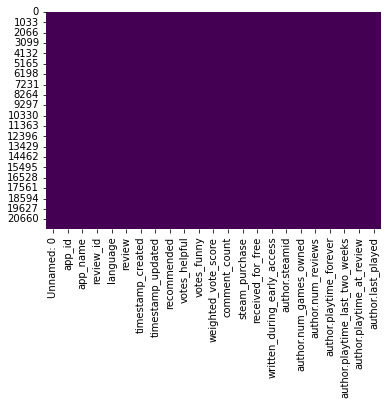

In [12]:
#let's visually see how many null values are there
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

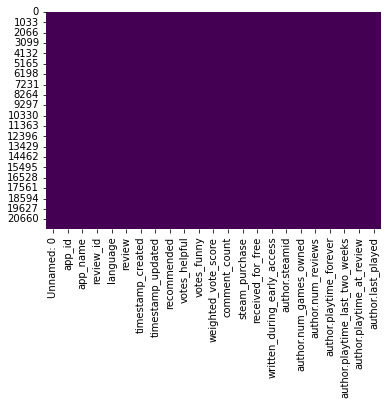

In [13]:
#Replace null values with mean of the column
df["author.playtime_at_review"]=pd.to_numeric(df["author.playtime_at_review"])
df["author.playtime_at_review"].fillna(df["author.playtime_at_review"].mean(), inplace=True)
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

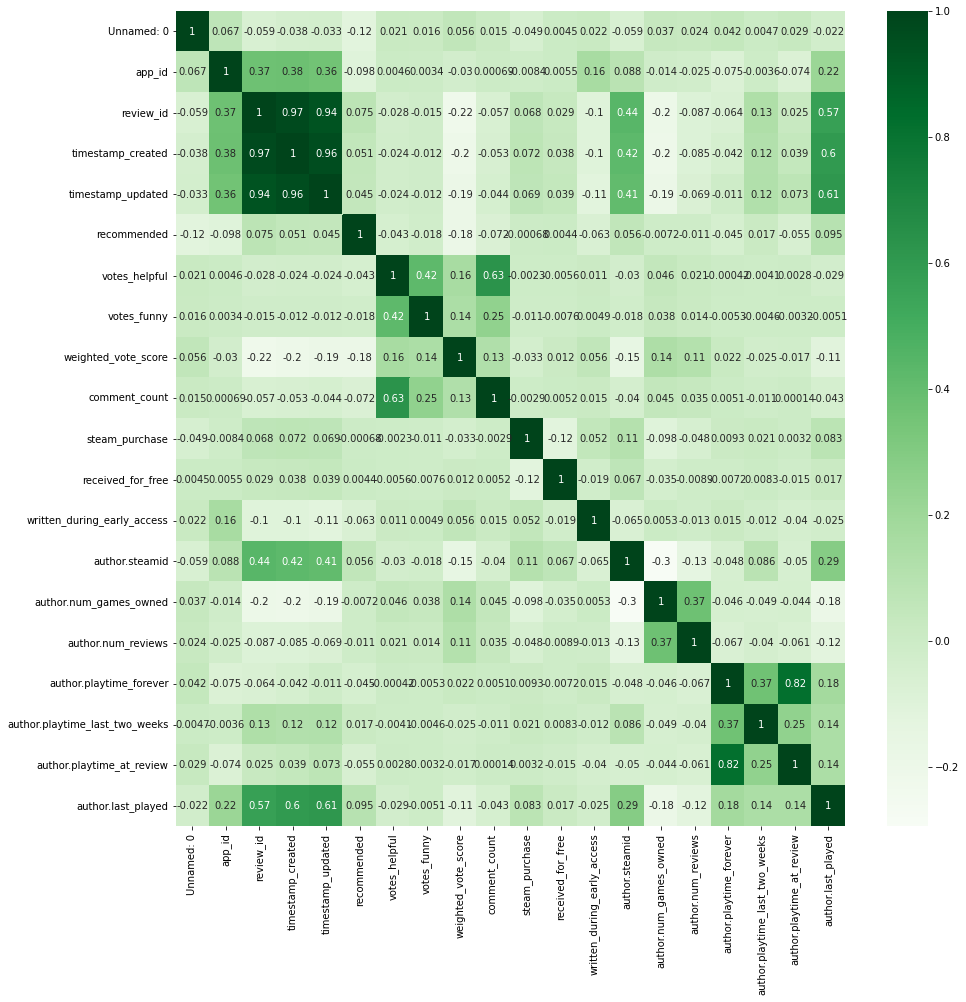

In [45]:
#Visualize how related are the entries
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Greens')

Text(0, 0.5, 'timestamp_updated')

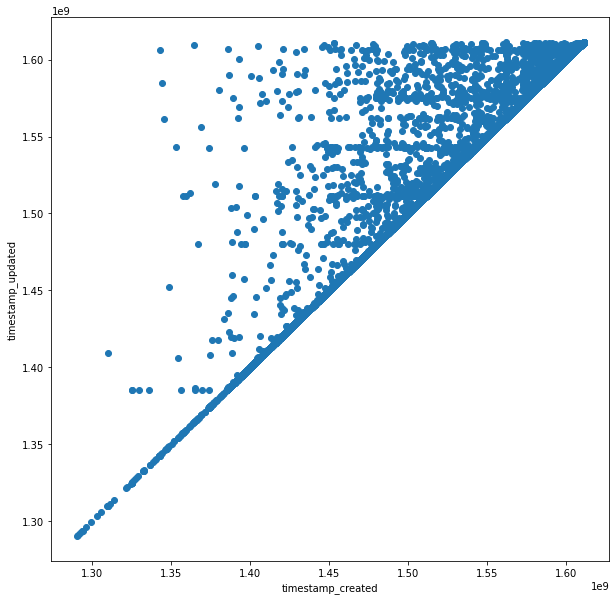

In [15]:
#we notice a high correlation between timestamp updated and created--->
#--->compare timestamp created vs updated
plt.figure(figsize=(10,10))
plt.scatter(x='timestamp_created',y='timestamp_updated',data=df)
plt.xlabel('timestamp_created')
plt.ylabel('timestamp_updated')

# RQ2

### Plot the number of reviews for each application in descending order

In [16]:
#Here we just handle the data in order to plot it in the following xell
s=df["app_name"].value_counts()
percent=1/100*df.shape[0]
s=s.groupby(np.where(s>=percent,s.index,'other games')).sum()
s=s.sort_values(axis=0, ascending=False, ignore_index=False)

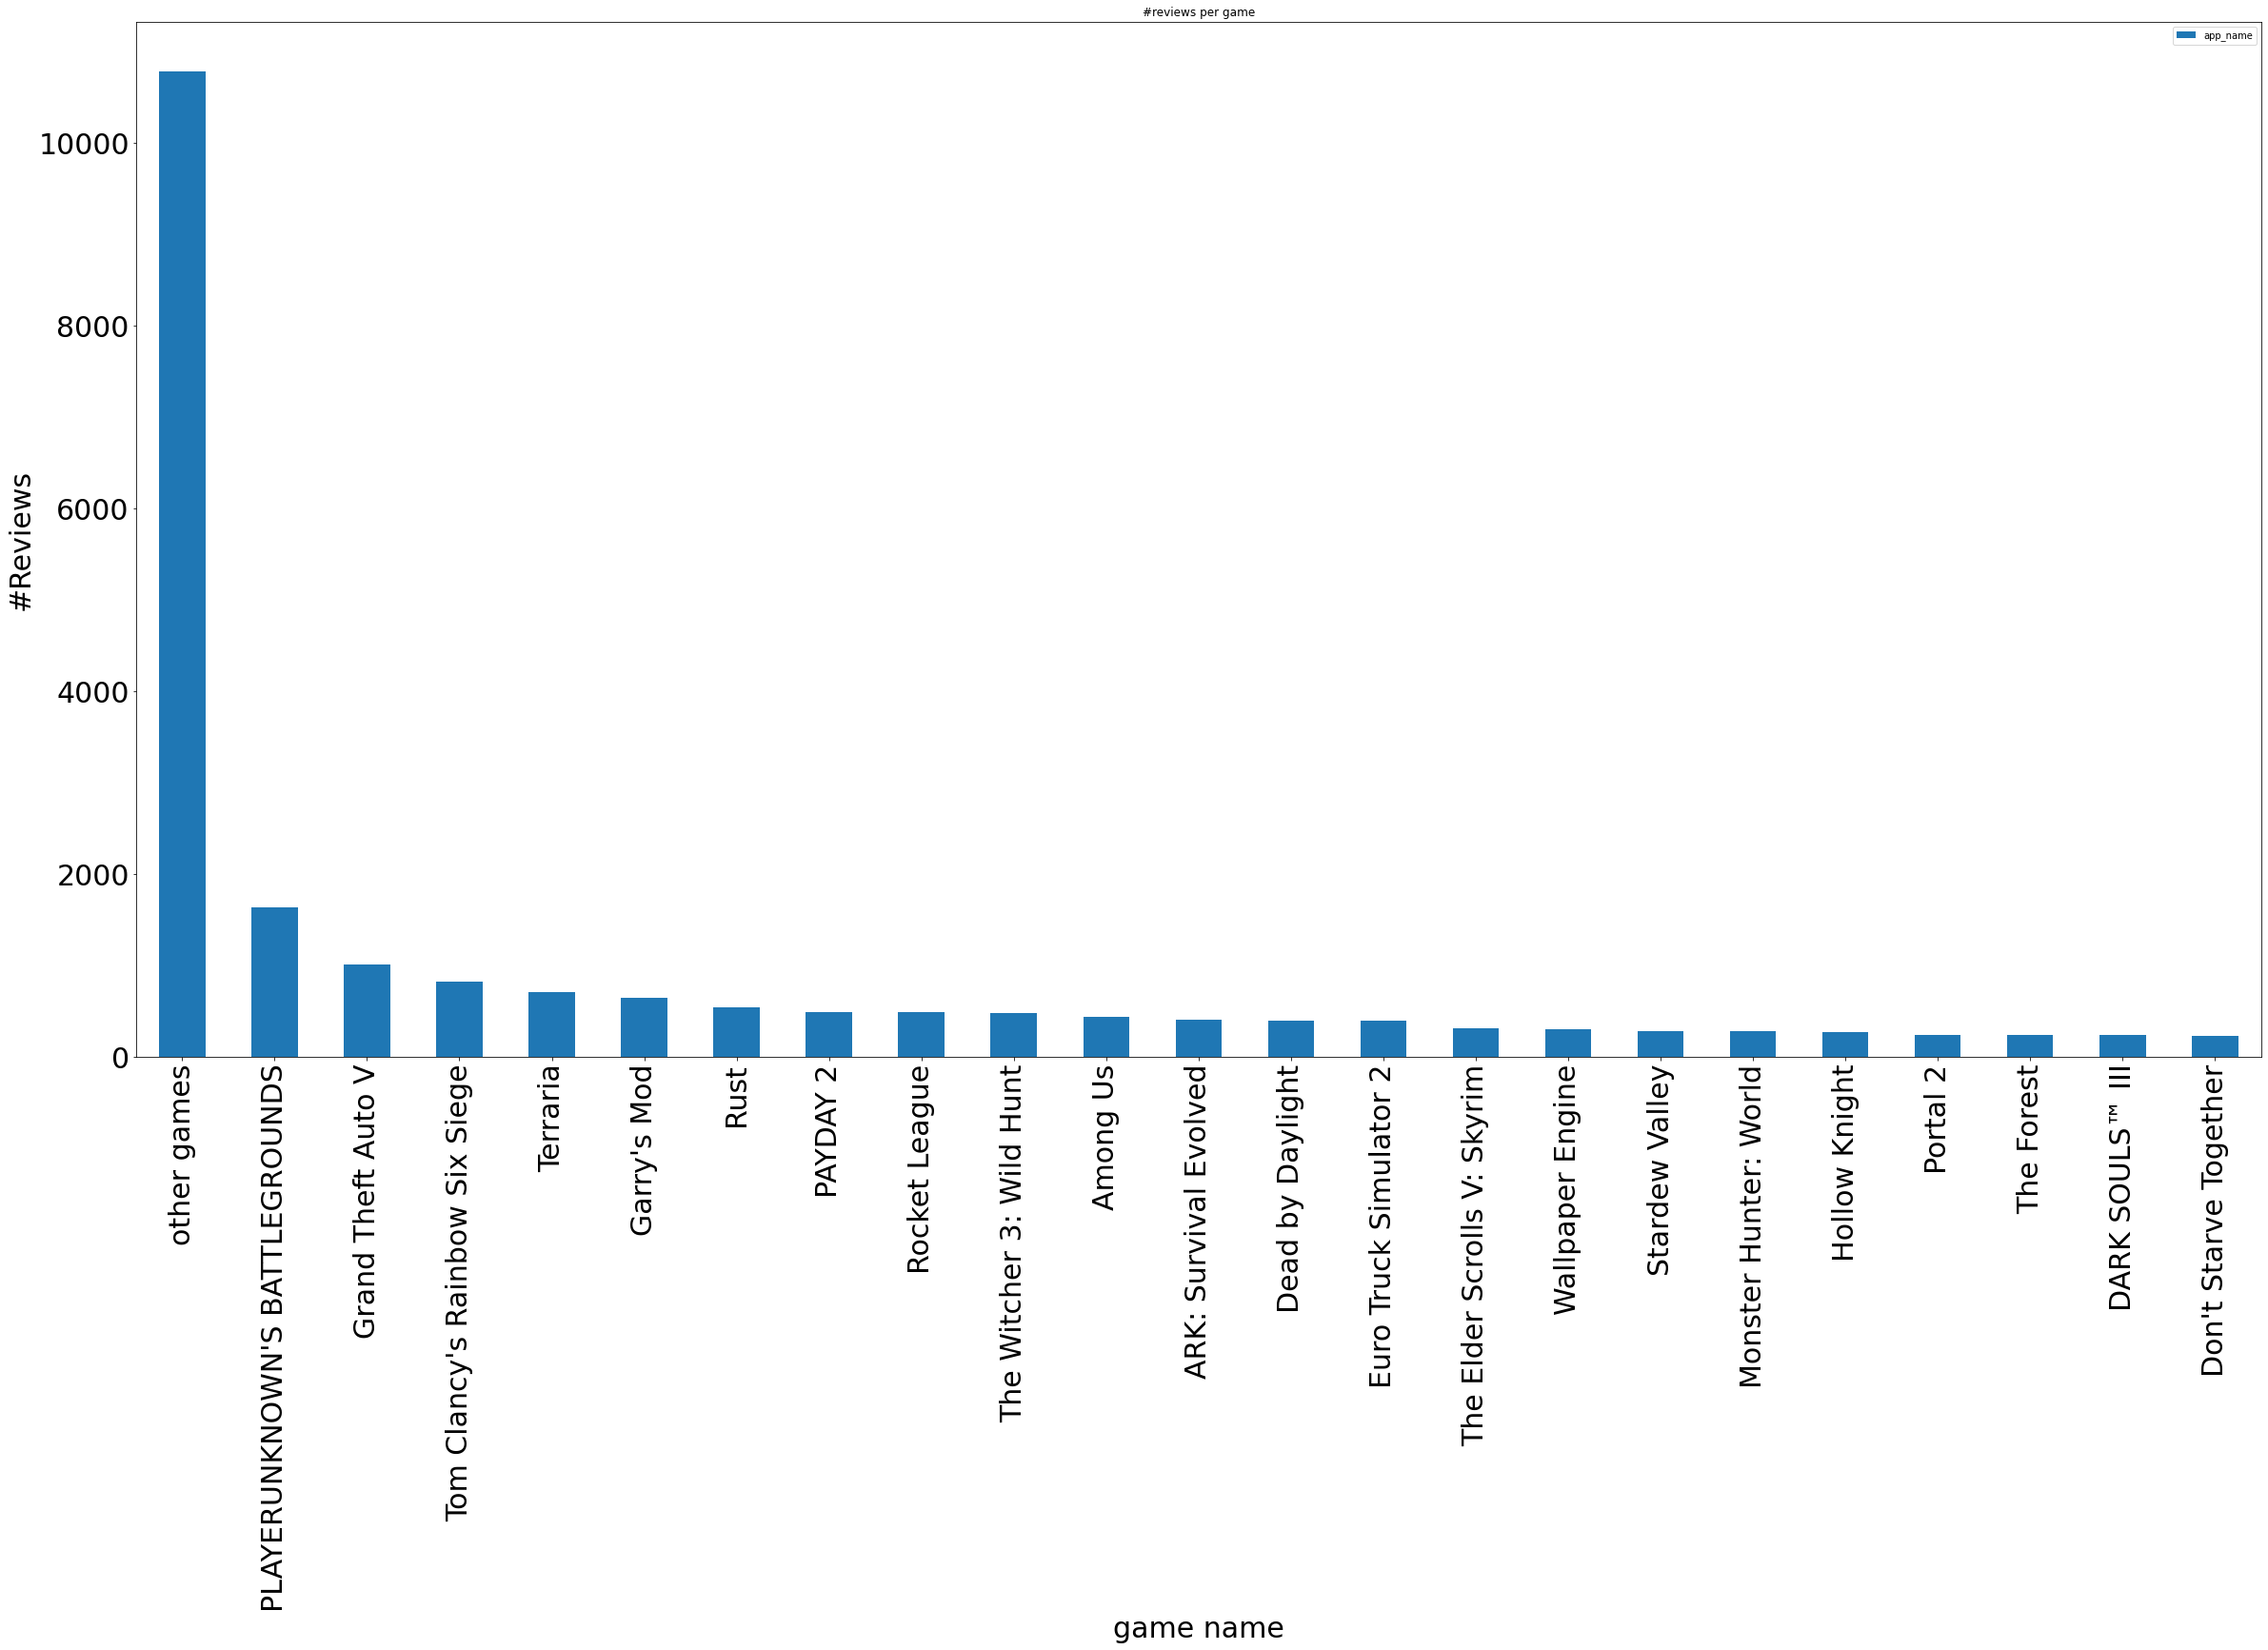

In [17]:
#We opted for grouping all the games with a low number of reviews (<= 1% of the total number of reviews) into a single column
ax=s.plot(kind='bar', title ="#reviews per game", figsize=(40,20), legend=True, fontsize=30)
ax.set_xlabel("game name", fontsize=30)
ax.set_ylabel("#Reviews", fontsize=30)
plt.show()

### What applications have the best Weighted Vote Score?

In [18]:
#It's not clear whether we have to take the games with the highest weighted score or do some sort of operation for every game (like a mean) 
#and then take the ones with the highest values -----> we'll implement both approaches

In [19]:
#Here we just pick the 10 games with the highest absolute score
df[["app_name", "weighted_vote_score"]].nlargest(10, "weighted_vote_score")

,app_name,weighted_vote_score
20180,NieR:Automata™,0.977017
15246,PLAYERUNKNOWN'S BATTLEGROUNDS,0.960459
16175,Jurassic World Evolution,0.954001
12162,DOOM,0.950808
2962,The Forest,0.948730
2767,Overcooked! 2,0.936883
10940,GRIS,0.936296
21586,Streets of Rogue,0.931483
2982,The Forest,0.928406
5899,Tom Clancy's Rainbow Six Siege,0.926661


In [20]:
#MEAN METHOD 
app_vote_mean = df[["app_name", "weighted_vote_score"]].groupby('app_name').mean()
app_vote_mean.nlargest(10, "weighted_vote_score")

,weighted_vote_score
app_name,
Clicker Heroes 2,0.617183
Battle Royale Trainer,0.600000
Ghost of a Tale,0.596466
Hunt Down The Freeman,0.578121
Heroes of Hammerwatch,0.542409
Ultimate Marvel vs. Capcom 3,0.524875
X Rebirth,0.523636
Torment: Tides of Numenera,0.521373
Rapture Rejects,0.518577


### Which applications have the most and the least recommendations? 
### How many of these applications were purchased, and how many were given for free?

In [21]:
#the 2 questions are done together..
#let's first reduce our dataset to the columns needed
rec=df.loc[:,["app_name","recommended","steam_purchase", "received_for_free"]] 

In [22]:
#now let's group the reviews by game name ("app_name")
rec_count=rec.groupby("app_name").aggregate(sum)
rec_count

,recommended,steam_purchase,received_for_free
app_name,,,
20XX,1,1,0
A Hat in Time,25,20,1
A Short Hike,9,8,0
A Way Out,12,10,0
ARK: Survival Evolved,324,317,9
...,...,...,...
XCOM 2,45,36,2
Yakuza 0,32,23,0
Youtubers Life,11,13,1


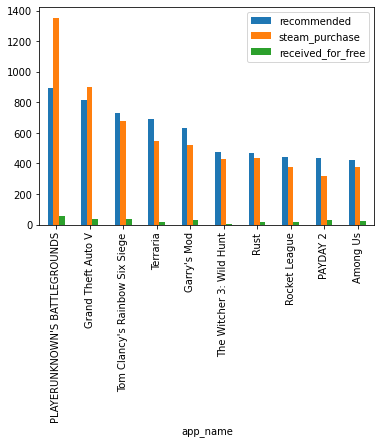

In [23]:
#Plot the ones with the highest number of recommendations
most_rec=rec_count.nlargest(10, "recommended")
most_rec.plot(kind='bar')

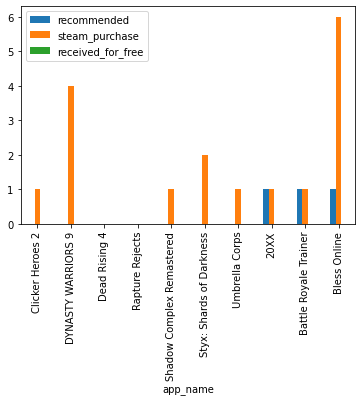

In [24]:
#Plot the ones with the lowest number of recommendations
least_rec=rec_count.nsmallest(10, "recommended")
least_rec.plot(kind='bar')

We decided to use bar plots in order to view the data because in this particular case they can summarise all the info we care about and make it readable right away.

# TQ1

1.
The algorithm we are given computes
$$alg(A, k) =s \quad \text{such that}\quad \#\{A_i \leq s\} = k$$
where we denote with $A_i$ the i-th element of the array A of length $n$, with $k\,\epsilon\,[0,1]$ .
We can notice a certain similarity with the **Quantile Function**. In fact, given a random variable $X$ and a threshold $p$, the quantile function $Q:[0,1]\rightarrow\mathbb{R}$ computes 
$$Q(p) = s \quad \text{such that} \quad P(X \leq s) = p$$
Finally we can say that the algorithm we are given computes the value $s$ so that the number of elements in the array A smaller or equal to $s$ will be equal to $k$: it is a sort of quantile function.

2.
The running time of the algorithm in the worst case scenario is $\Theta(n)$: consider k=len(A)=n and the case where $s$ is equal to the first element of A for each iteration. Then the s satisfying the condition will be picked at the $(n-1)$-th iteration. From this we have the result of complexity equal to $\Theta(n)$ (not considering constants).

3.
The running time of the algorithm in the best case scenario is $\Theta(1)$: we will be picking the right $s$ right away (at the first try).

# RQ8

### Can you find any significant relationship between the time that a user lets pass before he updates the review and the Weighted Vote Score? Use an appropriate statistical test or technique and support your choice.



In [25]:
#as before, reduce our dataset with just the entries we need
tab=df.loc[:,["timestamp_created","timestamp_updated","weighted_vote_score","recommended"]]  #last column is needed for the next question
tab

,timestamp_created,timestamp_updated,weighted_vote_score,recommended
0,1611064961,1611064961,0.000000,True
1,1610270857,1610270857,0.000000,True
2,1610150642,1610150642,0.563492,True
3,1610118764,1610118764,0.000000,True
4,1610071634,1610071634,0.000000,True
...,...,...,...,...
21668,1585014967,1585356381,0.000000,True
21669,1585013298,1585013298,0.525862,True
21670,1584998613,1584998613,0.000000,True
21671,1584995112,1584995112,0.000000,True


In [26]:
#we observe that there are many rows with weight 0, we want to remove those
tab = tab[tab.weighted_vote_score != 0]
tab

,timestamp_created,timestamp_updated,weighted_vote_score,recommended
2,1610150642,1610150642,0.563492,True
10,1609287809,1609287809,0.526316,True
12,1609144414,1609144414,0.497487,True
13,1608930039,1608930039,0.523810,True
16,1608677217,1608677217,0.523810,True
...,...,...,...,...
21650,1590016491,1590016491,0.523810,True
21660,1585503259,1606568485,0.563492,True
21662,1585250647,1585250647,0.545455,True
21669,1585013298,1585013298,0.525862,True


In [27]:
#now it's time to convert the 2 timestamp columns into a readable way and do
#timestamp_updated - timestamp_created (it's the variable we care about!)

In [28]:
tab=tab.assign(timestamp_diff = (tab.timestamp_updated-tab.timestamp_created)*1/(60*60*24)) #convert to days unit of measure (instead of seconds)
tab=tab.drop(columns=['timestamp_updated', 'timestamp_created'])

In [29]:
tab #We made it!

,weighted_vote_score,recommended,timestamp_diff
2,0.563492,True,0.000000
10,0.526316,True,0.000000
12,0.497487,True,0.000000
13,0.523810,True,0.000000
16,0.523810,True,0.000000
...,...,...,...
21650,0.523810,True,0.000000
21660,0.563492,True,243.810486
21662,0.545455,True,0.000000
21669,0.525862,True,0.000000


Text(0, 0.5, 'time diff [days]')

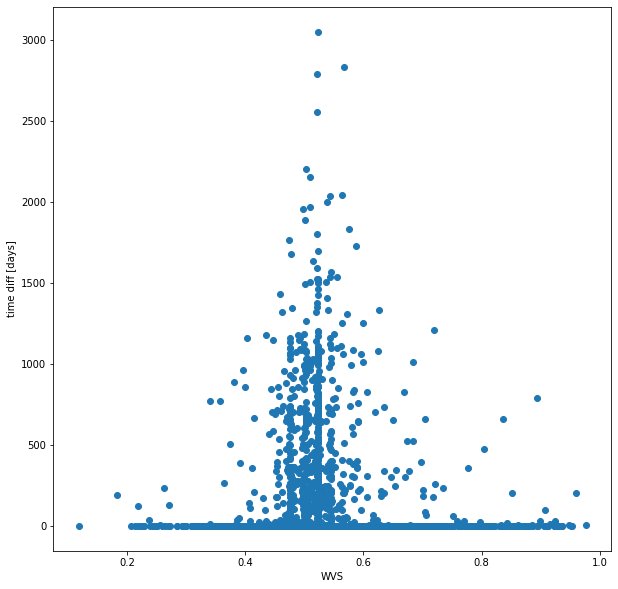

In [30]:
#it's time to plot and see what we have here before we start working on this data
plt.figure(figsize=(10,10))
plt.scatter(x='weighted_vote_score',y='timestamp_diff',data=tab)
plt.xlabel('WVS')
plt.ylabel('time diff [days]')

In [ ]:
#Looking at the structure of our data we can already suppose that there is no linear relation between the weighted vote score and the 
#time that a user lets pass before he updates the review, but let's check that

In [34]:
from scipy import stats
#Pearson test
correlation = stats.pearsonr(x,y)
print("Pearson's correlation coefficent is:",round(correlation[0],4))

Pearson's correlation coefficent is: 0.0181


Since the coefficent obtained is very low, we can assert that there is no linear correlation between the time that a user lets pass before he updates the review and the weighted vote score.
But there might be a higher degree correlation, we can check that by running some fits on our data

In [31]:
#In this cell we define all the functions we need to run fits on our data

from scipy.optimize import curve_fit
from scipy.stats import t
from numpy import exp

def tt(x,n):
    return t.pdf(x,n)
def gaus(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
def poli(x,a,b,c):
    return a+b*x+c*x*x


#reassign our columns of interest to x,y just to make the code more readable
x=tab["weighted_vote_score"]
y=tab["timestamp_diff"]

In [32]:
#Here we compute the parameters for the fits
param_t, param_cov_t = curve_fit(tt, x, y) #student T
param_g, param_cov_g = curve_fit(gaus,x,y) #gaussian
param_p, param_cov_p = curve_fit(poli,x,y) #polinomyal of 2nd order

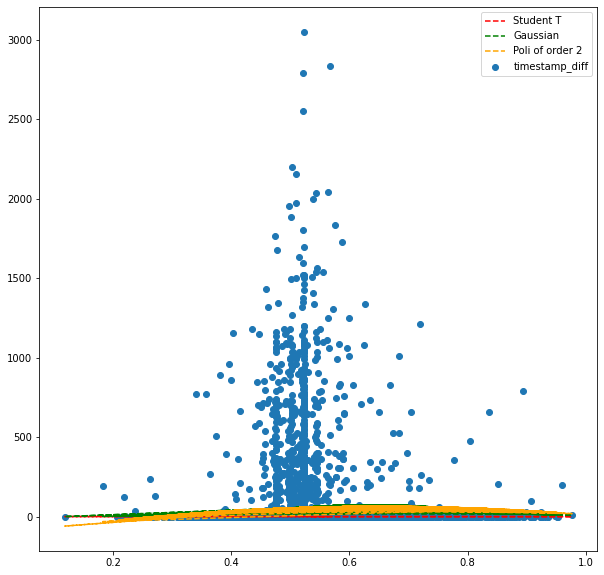

In [46]:
#ans stores the new y-data according to
#the coefficients given by curve-fit() function
#then we just plot everything

plt.figure(figsize=(10,10))

ans_t=t.pdf(x,param_t[0])
plt.plot(x, ans_t, '--', color ='red', label ="Student T")

ans_g=param_g[0]*exp(-(x-param_g[1])**2/(2*param_g[2]**2))
plt.plot(x, ans_g, '--', color ='green', label ="Gaussian")

ans_p=param_p[0]+param_p[1]*x+param_p[2]*x**2
plt.plot(x, ans_p, '--', color ='orange', label ="Poli of order 2")



plt.scatter(x='weighted_vote_score',y='timestamp_diff',data=tab)

#plt.xlim([0,1])
plt.legend()
plt.show()

Regardless of the function we use for our fit we are always obtaining very similar results, hence the variables we are taking into consideration are probably not correlated at all.

### Is there any change in the relationship of the variables mentioned in the previous literal if you include whether an application is recommended or not in the review? Use an appropriate statistical test or technique and support your choice.

In [35]:
#let's first split the data in 2 dataframes: one with true values for the recommendation
#and one with false values
tabT = tab[tab.recommended != False]
tabF = tab[tab.recommended == False]

#now let's plot the 2 (sub)dataset we have


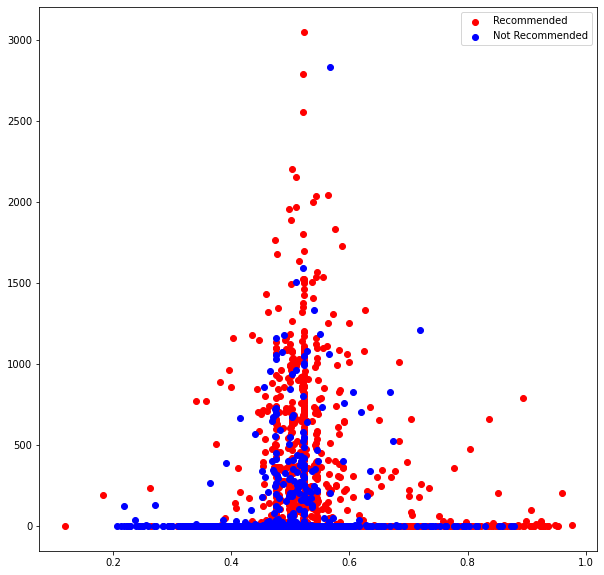

In [36]:
plt.figure(figsize=(10,10))

ax1=plt.scatter(x='weighted_vote_score', y='timestamp_diff', data=tabT, color="red")

ax2=plt.scatter(x='weighted_vote_score', y='timestamp_diff', data=tabF, color="blue")

plt.legend([ax1,ax2],["Recommended","Not Recommended"])
plt.show()

At first sight they still look like before but let's run some test on them before giving a judgement

In [37]:
#as usual, reassigning columns to make the code more readable
xT, yT = tabT['weighted_vote_score'],tabT['timestamp_diff']
xF, yF = tabF['weighted_vote_score'],tabF['timestamp_diff']

#Run the Pearson test
corrT = stats.pearsonr(tabT['weighted_vote_score'],tabT['timestamp_diff'])
corrF = stats.pearsonr(tabF['weighted_vote_score'],tabF['timestamp_diff'])

print("Pearson's correlation coefficent for the Recommended set of data is:",round(corrT[0],4))
print("Pearson's correlation coefficent for the not Recommended set of data is:",round(corrF[0],4))

Pearson's correlation coefficent for the Recommended set of data is: -0.009
Pearson's correlation coefficent for the not Recommended set of data is: 0.0895


For both cases we still get no linear correlation between the time a user waits to update the review and the weighted vote score. \
Let's try with fitting method as well:

In [38]:
#Run fits to see if we have a higher 
param_tT, param_cov_tT = curve_fit(tt, xT, yT)
param_gT, param_cov_gT = curve_fit(gaus,xT,yT)
param_pT, param_cov_pT = curve_fit(poli,xT,yT)

param_tF, param_cov_tF = curve_fit(tt, xF, yF)
param_gF, param_cov_gF = curve_fit(gaus,xF,yF)
param_pF, param_cov_pF = curve_fit(poli,xF,yF)

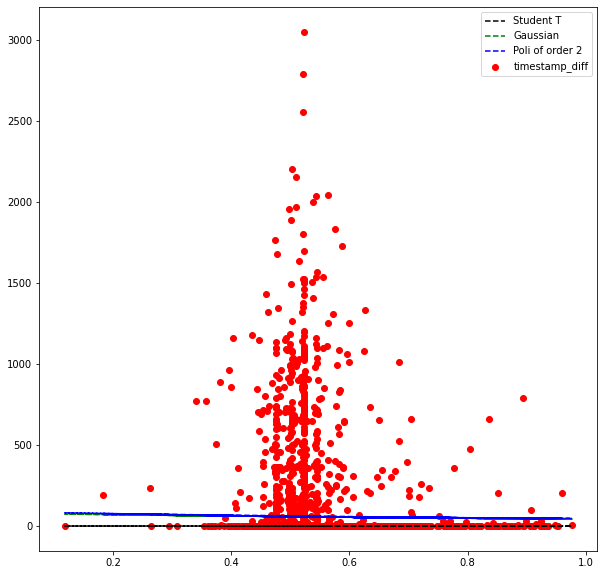

In [47]:
#plot everything
plt.figure(figsize=(10,10))

ans_tT=t.pdf(xT,param_tT[0])
plt.plot(xT, ans_tT, '--', color ='black', label ="Student T")

ans_gT=param_gT[0]*exp(-(xT-param_gT[1])**2/(2*param_gT[2]**2))
plt.plot(xT, ans_gT, '--', color ='green', label ="Gaussian")

ans_pT=param_pT[0]+param_pT[1]*xT+param_pT[2]*xT**2
plt.plot(xT, ans_pT, '--', color ='blue', label ="Poli of order 2")


plt.scatter(x='weighted_vote_score',y='timestamp_diff',data=tabT, color="red")

#plt.xlim([0,1])
plt.legend()
plt.show()

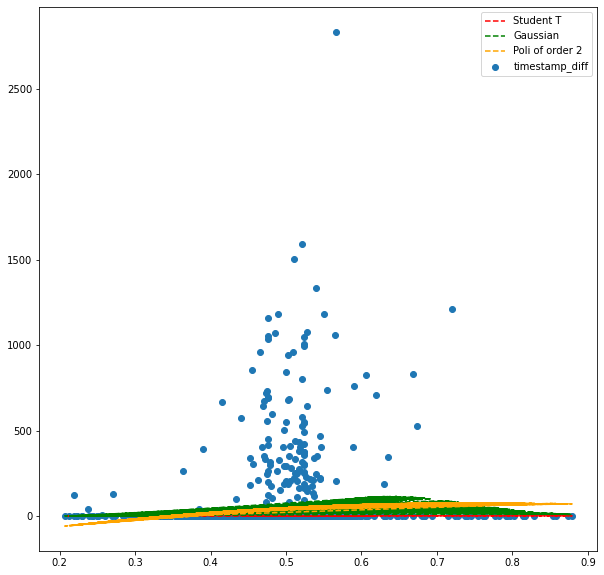

In [49]:
plt.figure(figsize=(10,10))

ans_tF=t.pdf(xF,param_tF[0])
plt.plot(xF, ans_tF, '--', color ='red', label ="Student T")

ans_gF=param_gF[0]*exp(-(xF-param_gF[1])**2/(2*param_gF[2]**2))
plt.plot(xF, ans_gF, '--', color ='green', label ="Gaussian")

ans_pF=param_pF[0]+param_pF[1]*xF+param_pF[2]*xF**2
plt.plot(xF, ans_pF, '--', color ='orange', label ="Poli of order 2")



plt.scatter(x='weighted_vote_score',y='timestamp_diff',data=tabF)

#plt.xlim([0,1])
plt.legend()
plt.show()

Results show that also in this case (considering wheter the review were recommended or not) there is no degree of correlation between the 2 variables we are taking into account.